# Plot up timeseries of CO2 pulled from the input4MIPs/CMIP6 forcing collection

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >
</p>
</div>

## Notes

**Summary**

Quick and dirty notebook to extract data from CMIP6 and CMIP6Plus input4MIPs data files and plot

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Notes**

PJD 17 Dec 2024 - Started - in reply to Ben S.<br>
PJD 18 Dec 2024 - Augment with CMIP6Plus data, add diagnostic plot with y-magnification<br>
PJD 09 Jan 2025 - Peeking at the ~1850 values across CMIP6 and CMIP6Plus (CR-CMIP-0-4-0) datasets

**Links**

## imports

In [1]:
%%time
import cftime
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xcdat as xc

CPU times: user 7.37 s, sys: 582 ms, total: 7.95 s
Wall time: 6.18 s


## where am i

In [2]:
os.getcwd()

'/home/durack1/git/notebooks/jlnbs'

## files - CMIP6

In [3]:
histPath = "/p/user_pub/work/input4MIPs/CMIP6/CMIP/UoM/UoM-CMIP-1-2-0/atmos/yr/mole-fraction-of-carbon-dioxide-in-air/gr1-GMNHSH/v20160830/"
histFile = os.path.join(histPath, "mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc")
fH = xc.open_dataset(histFile, decode_times=False)
# fix 0-indexed time axis - https://github.com/xCDAT/xcdat/discussions/475
time = xr.coding.times.decode_cf_datetime(fH.time, 'days since 0000-01-01', use_cftime=True, calendar='proleptic_gregorian')
# put fixed time back into dataset
fH['time'] = time

In [4]:
futPath = "/p/user_pub/work/input4MIPs/CMIP6/ScenarioMIP/UoM/UoM-REMIND-MAGPIE-ssp585-1-2-1/atmos/yr/mole_fraction_of_carbon_dioxide_in_air/gr1-GMNHSH/v20181127/"
futFile = os.path.join(futPath, "mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-REMIND-MAGPIE-ssp585-1-2-1_gr1-GMNHSH_2015-2500.nc")
fF = xc.open_dataset(futFile)

In [5]:
fH

<xarray.Dataset> Size: 73kB
Dimensions:                                 (time: 2015, bound: 2, sector: 3)
Coordinates:
  * time                                    (time) object 16kB 0000-07-02 00:...
  * sector                                  (sector) int32 12B 0 1 2
Dimensions without coordinates: bound
Data variables:
    time_bnds                               (time, bound) float64 32kB ...
    sector_bnds                             (sector, bound) float64 48B ...
    mole_fraction_of_carbon_dioxide_in_air  (time, sector) float32 24kB ...
Attributes: (12/26)
    Conventions:             CF-1.6
    comment:                 Data provided are global and hemispheric area-we...
    variable_id:             mole_fraction_of_carbon_dioxide_in_air
    product:                 assimilated observations
    creation_date:           2016-08-30T18:24:56Z
    frequency:               yr
    ...                      ...
    contact:                 malte.meinshausen@unimelb.edu.au
    table_id:                input4MIPs
    source_id:               UoM-CMIP-1-2-0
    institution:             Australian-German Climate & Energy College, The ...
    tracking_id:             hdl:21.14100/18da2d96-a1e4-40f4-9bd5-0a435ff78e55
    nominal_resolution:      10000 km

In [6]:
fH.mole_fraction_of_carbon_dioxide_in_air[:,0].data[1:15]

array([277.137, 277.16 , 277.158, 277.157, 277.167, 277.172, 277.171,
       277.175, 277.176, 277.179, 277.194, 277.198, 277.201, 277.201],
      dtype=float32)

In [7]:
fF

<xarray.Dataset> Size: 23kB
Dimensions:                                 (time: 486, bound: 2, sector: 3)
Coordinates:
  * sector                                  (sector) int64 24B 0 1 2
  * time                                    (time) object 4kB 2015-07-02 12:0...
Dimensions without coordinates: bound
Data variables:
    time_bnds                               (time, bound) object 8kB ...
    sector_bnds                             (sector, bound) float64 48B ...
    mole_fraction_of_carbon_dioxide_in_air  (time, sector) float64 12kB ...
Attributes: (12/26)
    title:               UoM-REMIND-MAGPIE-ssp585-1-2-1: REMIND-MAGPIE-ssp585...
    institution_id:      UoM
    dataset_category:    GHGConcentrations
    source_version:      1.2.1
    institution:         Australian-German Climate & Energy College, The Univ...
    activity_id:         input4MIPs
    ...                  ...
    references:          Malte Meinshausen, Zebedee Nicholls, et al. Future s...
    grid:                global and hemispheric means - area-averages from th...
    grid_label:          gr1-GMNHSH
    nominal_resolution:  10000 km
    variable_id:         mole_fraction_of_carbon_dioxide_in_air
    comment:             Note: Zonal means for 15-degree lat bands or 0.5-deg...

In [8]:
fF.mole_fraction_of_carbon_dioxide_in_air[:,0].data[1:15]

array([403.11697388, 405.79397583, 408.75994873, 411.78994751,
       414.89096069, 418.06497192, 421.33496094, 424.72094727,
       428.21994019, 431.82995605, 435.54995728, 439.37796021,
       443.31494141, 447.36096191])

## combine and plot

In [9]:
newCO2 = np.concatenate((fH.mole_fraction_of_carbon_dioxide_in_air[:,0], fF.mole_fraction_of_carbon_dioxide_in_air[:,0]))

In [10]:
newCO2

array([ 277.45401001,  277.13699341,  277.16000366, ..., 2011.01000977,
       2010.35998535, 2010.02001953])

In [11]:
newCO2.shape

(2501,)

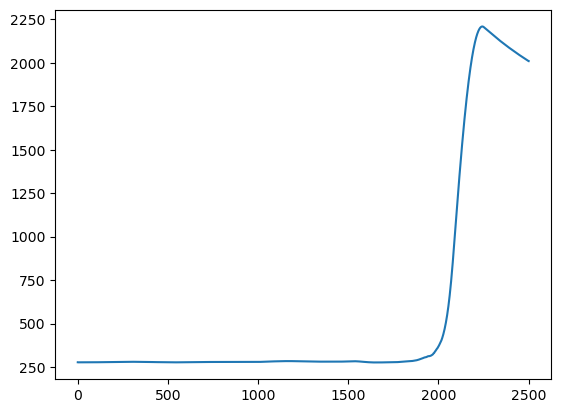

In [12]:
plt.plot(np.arange(0, 2501), newCO2)

## files - CMIP6Plus

In [13]:
histPath = "/p/user_pub/work/input4MIPs/CMIP6Plus/CMIP/CR/CR-CMIP-0-4-0/atmos/yr/co2/gm/v20241205/"
histFile1 = os.path.join(histPath, "co2_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-0-4-0_gm_0001-0999.nc")
fH1 = xc.open_dataset(histFile1)
histFile2 = os.path.join(histPath, "co2_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-0-4-0_gm_1000-1749.nc")
fH2 = xc.open_dataset(histFile2)
histFile3 = os.path.join(histPath, "co2_input4MIPs_GHGConcentrations_CMIP_CR-CMIP-0-4-0_gm_1750-2022.nc")
fH3 = xc.open_dataset(histFile3)

In [14]:
fH3

<xarray.Dataset> Size: 8kB
Dimensions:    (time: 273, bnds: 2)
Coordinates:
  * time       (time) object 2kB 1750-07-02 12:00:00 ... 2022-07-02 12:00:00
Dimensions without coordinates: bnds
Data variables:
    co2        (time) float32 1kB ...
    time_bnds  (time, bnds) object 4kB ...
Attributes: (12/25)
    Conventions:             CF-1.7
    activity_id:             input4MIPs
    comment:                 This is an interim dataset, do not use in produc...
    contact:                 zebedee.nicholls@climate-resource.com;malte.mein...
    creation_date:           2024-12-05T13:55:11Z
    dataset_category:        GHGConcentrations
    ...                      ...
    references_short_names:  NOAA surface flask --- NOAA in-situ --- Meinshau...
    source_id:               CR-CMIP-0-4-0
    source_version:          0.4.0
    target_mip:              CMIP
    tracking_id:             hdl:21.14100/e0d591c4-3fad-4ae8-84fd-1b8094b16632
    variable_id:             co2

## concatenate together

In [15]:
fHNew = np.concatenate((fH1.co2[:], fH2.co2[:], fH3.co2[:]))
fHNewTime = np.concatenate((fH1.time[:], fH2.time[:], fH3.time[:]))

In [16]:
fHNew.shape

(2022,)

In [17]:
fill = np.empty(2500-2022)
fill[:] = np.nan
one = np.empty(1)
one[:] = np.nan
fHNewLong = np.concatenate((one, fHNew, fill))
fHNewLong.shape

(2501,)

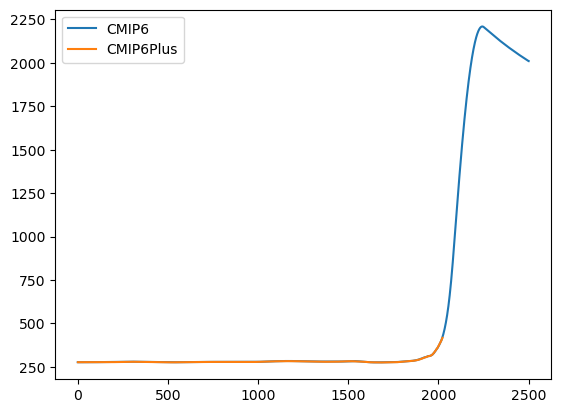

In [18]:
# Plot both timeseries
plt.plot(np.arange(0, 2501), newCO2, label="CMIP6")
plt.plot(np.arange(0, 2501), fHNewLong, label="CMIP6Plus")
plt.legend()

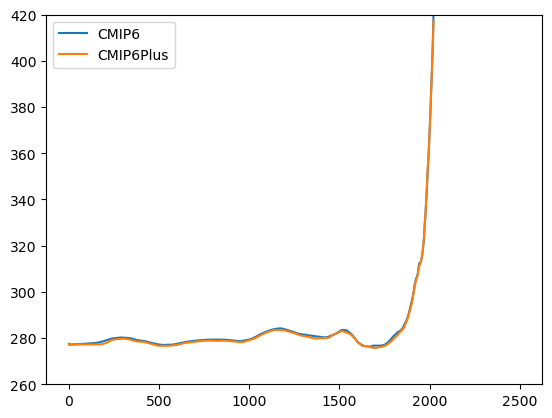

In [19]:
# Plot both timeseries with y-axis magnification
plt.plot(np.arange(0, 2501), newCO2, label="CMIP6")
plt.plot(np.arange(0, 2501), fHNewLong, label="CMIP6Plus")
plt.ylim(260, 420)
plt.legend()

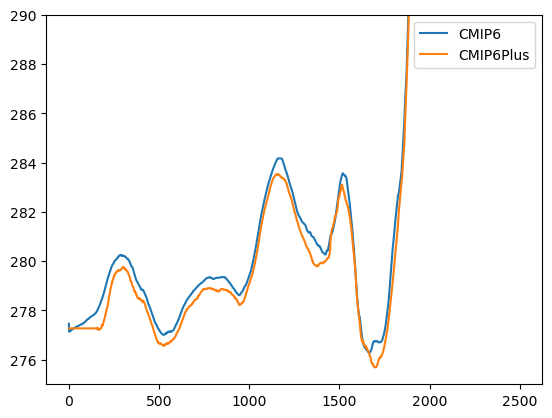

In [20]:
# Plot both timeseries with extreme y-axis magnification
plt.plot(np.arange(0, 2501), newCO2, label="CMIP6")
plt.plot(np.arange(0, 2501), fHNewLong, label="CMIP6Plus")
plt.ylim(275, 290)
plt.legend()

## curious about piControl 1850 values, so taking a peek (1849, 1850, 1851)

In [21]:
# Extract data for a time range
startDate = "1849-01-01"  # annual axis values should be indexed around YYYY-07-xx, so start and end of year includes 1849, 1851
endDate = "1851-12-31"
cm6_piRange = fH.sel(time=slice(startDate, endDate))
cm6P_piRange = fH3.sel(time=slice(startDate, endDate))

In [22]:
cm6_piRange.mole_fraction_of_carbon_dioxide_in_air[:,0].data

array([284.207, 284.317, 284.451], dtype=float32)

In [23]:
cm6P_piRange.co2.data

array([283.54922, 283.66946, 283.7713 ], dtype=float32)